
 # TODO Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 # TODO El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **TODO A continuación...Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente). Aquí tienes un ejemplo del que puedes partir y seguir completando:

| Intérprete | Licencia | Fabricante         | Características  |
| ---------- | -------- | ------------------ | ---------------- |
| Ahkab      | GPL      | Giuseppe Venturini | Basado en Python |
| LTspice    | freeware | Mike Engelhardt    | Intérprete Spice más usado del mercado  |
| OrCAD EE PSpice | Propietario | OrCAD Systems Corporation | Escrito en C y C++ |
| Ngspice | BSD | | Basado en Spice3, Cider y Xspice|

   

 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 
Se puede hacer una analogía entre un lenguaje estadar como el ANSI C y Spice si hablamos de estándares y sus diferentes implementaciones. En este caso se va a hablar desde la perspectiva de quien escribe estas líneas en cuanto a su experiencia con diversos compiladores de C mediante la siguiente tabla:

| Compidor | Licencia | Fabricante         | Experiencia personal  |
| ---------- | -------- | ------------------ | ---------------- |
| Turbo C   | Propietario (freeware desde 2006)   | Borland | Entorno Univesitario |
| gcc  | GPL | Free Software Foundation  | Entorno Univesitario |
| MPLAB C Compiler   | Propietario   | Microchip Technology | Estancia en empresa italiana dedicada al desarrollo de microcontroladores |


 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

 > **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

| Prefijo múltiplo |  Abreviatura  | Equivalecia numérica |
| ---------- | -------- | -------- |
| tera| T | $$ 10 ^ {12} $$|
| giga| G | $$ 10 ^ 9 $$|
| mega| M | $$ 10 ^ 6 $$|
| kilo| k | $$ 10 ^ 3 $$|
| hecto| h | $$ 10 ^ 2 $$|
| deca| da | $$ 10 ^ 1 $$|
| deci| d | $$ 10 ^ {-1} $$|
| centi| c | $$ 10 ^ {-2} $$|
| mili| m | $$ 10 ^ {-3} $$|
| micro| $$ \mu $$ | $$ 10 ^ {-6} $$
| nano| n | $$ 10 ^ {-9} $$
| pico| p | $$ 10 ^ {-12} $$

 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

| Cantidad | Unidad SI  | Unidad Fundamental SI |
| ---------- | -------- | -------- |
| Corriente eléctrica | Amperio A | Sí |
| Resistencia eléctrica | Ohmio $$\varOmega$$ | No |
| Diferencia de potencial | Voltio V | No |

 ## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 
 https://www.jetbrains.com/es-es/mps/concepts/domain-specific-languages/
 https://dosideas.com/noticias/actualidad/487-los-lenguajes-especificos-de-dominio
 

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).


| UIC | Funcionalidad  |
| ---------- | -------- |
| 0 | all node voltages and currents through v/h/e/sources will be assumed to be zero at t = tstart |
| 1 | the status at ‘t = tstart is the last result from a OP analysis |
| 2 | the status at t=tstart is the last result from a OP analysis on which are set the values of currents through inductors and voltages on capacitors specified in their ic. This is done very roughly, checking is recommended |
| 3 | Load a user supplied ic. This requires a .ic directive somewhere in the netlist and a .ic‘s name and ic_label must match |



 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implmentación más en Python del estándar Spice.
 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).

| Estándar | Implementación  |
| ---------- | -------- |
| SQL | PL/SQL |
| SQL | Transact-SQL |
| ECMAScript | JavaScript |
 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. La configuración de Python en VS Code está bien explicada su [documentación](https://code.visualstudio.com/docs/python/python-tutorial).

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:

In [1]:
!pip install ahkab


 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instlar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [4]:
!conda install -y -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [23]:
import pylab as plt
import ahkab

 > **Pylab** es una librería de Python que incluye otras librerías tales como matplotlib, para la representación gráfica, y numpy,para cálculo matemático .
 Uno de sus principales usos es como alternativa libre a Matlab.

 ## Circuitos sencillos para trabjar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [4]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [5]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [6]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}, {'type': 'tran', 'tstep': 0.01, 'tstart': 6.5, 'tstop': 7.5, 'x0': None, 'method': None}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

La función parse_analysis devuelve una lista que guardamos en lista_de_análisis. Las lista en Python Las listas (o ‘List’) en Python son un tipo de estructuras de datos muy flexible que guardan de forma ordenada un conjunto de datos que no tiene porque ser del mismo tipo.
En este caso, la función devuelve e cicuito y las directivas a analizar.

 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.
 Mediante las siguientes líneas vamos a crear esos ficheros temporales cuando  un elemento de la lista sea dc o tran. Suponemos que solo puede haber una ocurrencia de cada uno.

 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.

In [7]:



lista_de_análisis[[i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()][0]]['outfile'] = "simulación2 dc.tsv"
lista_de_análisis[[i for i, d in enumerate(lista_de_análisis) if "tran" in d.values()][0]]['outfile'] = "simulación tran.tsv"



Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [8]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [9]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2020-12-22 09:14:09, data file simulación2 dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [10]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).
Para la representación vamos a usar [matplotlib](https://matplotlib.org), que en nuestro caso la hemos referenciado al realizar la llamada de pylab, ya que esta libería la incluye, pero se podría haber llamado directamente a matplotlib.

Text(0.5, 0, 'voltaje (voltios)')

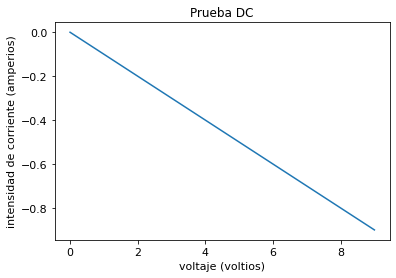

In [11]:
figura = plt.figure()
plt.title("Prueba DC")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label="Voltaje (V1)")
plt.ylabel('intensidad de corriente (amperios)')
plt.xlabel('voltaje (voltios)')

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [14]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.9}


 A continuación analizamos el resltado obtenido. Cabe destacar que trataremos los resutados en valor absoluto, ya que los signos dependen de cómo hemos definido el circuito.
En la definición del circuito tenemos en el punto 1 9 voltios y una resitencia entre el punto 0 y 1 de 10 ohmios. 
Aplicando la ley de Ohm vamos a calcular la intensidad de corriente: 

 $$
 I = \frac{V}{R}
 $$
 
 Sustituimos nuestros valores en la fórmula:

 $$
 I = \frac{9 \mathrm{V}}{10\varOmega}=0.9 \mathrm{A}
 $$

 Ahora vamos a resolver el cálculo con Sympy. Pylab también incluye Sympy por lo que no tendremos que hacer nuevamente la llamada a esta librería.
 



In [10]:

from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 10*ohms
#intensidad = symbols('i')
intensidad = amperes
ley_ohm = Eq(v1, intensidad*r1)
solucion= solve(ley_ohm, intensidad)
convert_to(solucion[0], [amperes]).n(1)


0.9*ampere

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [68]:
#import platform
#%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
#if platform.system() == "Windows":
#%alias lts C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe -ascii -b
%alias lts C:\LTspice\XVIIx64.exe -ascii -b

**Pregunta**: ¿Qué significan las opciones `-b` y `-ascii`? Algo de ayuda [aquí](http://ltwiki.org/LTspiceHelp/LTspiceHelp/Command_Line_Switches.htm).  
b procesamiento por lotes  
ascii permite utilizar archivos de extensión raw con los resultados de la simulación  

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [69]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencillo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [70]:
lts "circuito sencillo.net"

Veamos el contenido de la simulación.

In [71]:
%pycat circuito sencillo.log

Circuit: * Este es un circuito sencillo adaptado para LTspice

Direct Newton iteration for .op point succeeded.

Date: Mon Dec 28 13:15:20 2020
Total elapsed time: 0.043 seconds.

tnom = 27
temp = 27
method = trap
totiter = 3
traniter = 0
tranpoints = 0
accept = 0
rejected = 0
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: 36 bytes object code size
Matrix Compiler2: 96 bytes object code size


Ahora repitamos lo mismo para el análisis `.dc`:

In [72]:
%%writefile "circuito sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencillo.net


In [73]:
lts "circuito sencillo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [76]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

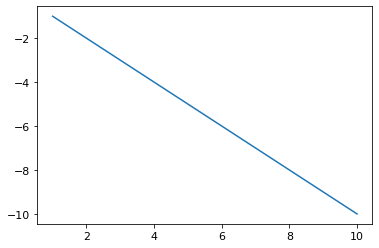

In [74]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
plt.plot(tiempo, voltaje)

** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [14]:
!ahkab "circuito sencillo.sp"

2020-12-28 11:10:47
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1              10              -9             -0.9      8.1

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9             -0.9     -8.1

Total power dissipation: 8.1 W

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.00000000000000000

**Ejercicio premium**: Graficar los datos anteriores con [Gnuplot](http://www.gnuplot.info). 

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). Más info [aquí](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [87]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [88]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimos los resultados del análisis `.op`:

In [89]:
print(resultados['op'])

OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serie.net).
Run on 2021-01-04 00:20:51, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

Cargamos primero todo lo relacionado con Sympy:

In [90]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

In [91]:
r1 = 3E3*ohms
intensidad_ahkab = resultados['op']['I(V1)'][0][0]*amperes
v2 = convert_to(intensidad_ahkab*r1, [volts])
v2

-1.5*volt

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

In [11]:
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
v1 = 9*volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3
intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
convert_to(solucion_para_intensidad[0], [amperes]).n(2)

0.0005*ampere

> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.

$$
\sum_i^N V_{\text{fuentes}}
$$

In [25]:
VFuentes = 9*volts
convert_to(VFuentes, [volts]).n(2)

9.0*volt

$$
\sum_j^M V_{\text{consumido en resistencias}}
$$

In [27]:

r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
ICircuito = 0.0005 * amperes
VR1 = volts
ley_ohm = Eq(VR1, ICircuito*r1)
solucion_para_voltajeR1 = solve(ley_ohm, VR1)
convert_to(solucion_para_voltajeR1[0], [volts]).n(2)

VR1 = volts
ley_ohm = Eq(VR1, ICircuito*r1)
solucion_para_voltajeR1 = solve(ley_ohm, VR1)
convert_to(solucion_para_voltajeR1[0], [volts]).n(2)

VR2 = volts
ley_ohm = Eq(VR2, ICircuito*r2)
solucion_para_voltajeR2 = solve(ley_ohm, VR2)
convert_to(solucion_para_voltajeR2[0], [volts]).n(2)

VR3 = volts
ley_ohm = Eq(VR3, ICircuito*r3)
solucion_para_voltajeR3 = solve(ley_ohm, VR3)
convert_to(solucion_para_voltajeR3[0], [volts]).n(2)

convert_to(solucion_para_voltajeR1[0] + solucion_para_voltajeR2[0] + solucion_para_voltajeR3[0], [volts]).n(2) 



9.0*volt

## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [28]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

Overwriting resistencias en paralelo 1.cir


In [29]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [30]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1.cir).
Run on 2020-12-28 23:07:07, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

# Circuito 1 
Añadimos las pilas virtuales en el primer circuito

In [3]:
%%writefile "resistencias en paralelo 1-v2.cir"
* resistencias en paralelo
vdd 0 1 type=vdc vdc=12
r2 1 2 1k
r3 2 3 220
Vdummy2 3 4 type=vdc vdc=0
r4 4 0 1.5k
Vdummy1 2 5 type=vdc vdc=0
r5 5 0 470
.op
.end

Overwriting resistencias en paralelo 1-v2.cir


In [99]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1-v2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)


In [100]:
print(resultados['op'])

OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1-v2.cir).
Run on 2021-01-04 00:41:12, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
V4          V         -2.8215      2.82151e-12    0
V5          V         -3.23533     3.23533e-12    0
I(VDD)      A         -0.00876467  0              0
I(VDUMMY2)  A         -0.001881    0              0
I(VDUMMY1)  A         -0.00688367  0              0


comprobamos la la Ley de Kirchhoff para las corrientes

Cálculos con Sympy


In [94]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq

In [104]:
IEntrante = float(resultados['op']['I(VDD)']) * amperes
convert_to(IEntrante,[amperes]).n(6)

-0.00876467*ampere

In [105]:
ISaliente= (float(resultados['op']['I(VDUMMY1)']) + float(resultados['op']['I(VDUMMY2)']))  * amperes
convert_to(ISaliente,[amperes]).n(6)

-0.00876467*ampere

In [11]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq

In [13]:
r2 = 1*kilo*ohms
r5 = 470*ohms
r3 = 220*ohms
r4 = 1.5*kilo*ohms

Rama R5 Pila Dummy1

In [17]:
rt=r5
#IRama = 0.00876467 * amperes
IRama = 0.00688367 * amperes
#IRama = 0.001881 * amperes
V1 = volts
ley_ohm = Eq(V1, IRama*rt)
solucion_para_voltaje1 = solve(ley_ohm, V1)
convert_to(solucion_para_voltaje1[0], [volts]).n(2)


3.2*volt

Rama r4 y Pila Dummy2

In [20]:
rt=r4
#IRama = 0.00876467 * amperes
#IRama = 0.00688367 * amperes
IRama = 0.001881 * amperes
V1 = volts
ley_ohm = Eq(V1, IRama*rt)
solucion_para_voltaje1 = solve(ley_ohm, V1)
convert_to(solucion_para_voltaje1[0], [volts]).n(2)

2.8*volt

# Circuito 2


In [19]:
%%writefile "resistencias en paralelo 2.cir"
.resitencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 5 0 vdc=1.5 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 0 560
.op
.end

Overwriting resistencias en paralelo 2.cir


In [106]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '.resitencias en paralelo'(netlist resistencias en paralelo 2.cir).
Run on 2021-01-04 00:42:13, data file None.
Variable    Units         Value        Error    %
----------  -------  ----------  -----------  ---
V1          V        -9          8.99994e-12    0
V5          V        -1.5        1.50001e-12    0
V2          V        -7.29441    7.29442e-12    0
V3          V        -6.39285    6.39285e-12    0
V4          V        -2.29487    2.29487e-12    0
I(V1)       A        -0.0362891  0              0
I(V2)       A         0.0321912  0              0


ponemos pilas virtuales para que Ahkab nos de la intensidad en la rama que no hay pila

In [25]:
%%writefile "resistencias en paralelo 2-v2.cir"
.resitencias en paralelo
v1 0 1 vdc=9 type=vdc
v2 0 5 vdc=1.5 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
Vdummy1 6 6 type=vdc vdc=0
r5 6 0 560
.op
.end

Overwriting resistencias en paralelo 2-v2.cir


In [109]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2-v2.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '.resitencias en paralelo'(netlist resistencias en paralelo 2-v2.cir).
Run on 2021-01-04 00:42:55, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           9e-12          0
V5          V        -1.5         1.5e-12        0
V2          V        -7.29441     7.29442e-12    0
V3          V        -6.39285     6.39286e-12    0
V4          V        -2.29487     2.29487e-12    0
V6          V        -2.29487     2.29487e-12    0
I(V1)       A        -0.0362891   0              0
I(V2)       A         0.0321912   0              0
I(VDUMMY1)  A         0.00409798  0              0


In [110]:
IEntrante = float(resultados['op']['I(V1)']) * amperes
convert_to(IEntrante,[amperes]).n(6)

-0.0362891*ampere

In [111]:
ISaliente= (float(resultados['op']['I(V2)']) + float(resultados['op']['I(VDUMMY1)']))  * amperes
convert_to(ISaliente,[amperes]).n(6)

0.0362891*ampere

# Circuito 3

In [30]:
%%writefile "resistencias en paralelo 3.cir"
* resistencias en paralelo
vdd 0 1 type=vdc vdc=9
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
v1 1 2 type=vdc vdc=0
v2 1 3 type=vdc vdc=0
v3 1 4 type=vdc vdc=0
.op
.end

Overwriting resistencias en paralelo 3.cir


In [112]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3.cir).
Run on 2021-01-04 00:43:05, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(VDD)      A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0


In [117]:
IEntrante = float(resultados['op']['I(VDD)']) * amperes
convert_to(IEntrante,[amperes]).n(3)

-0.0144*ampere

In [118]:
ISaliente= (float(resultados['op']['I(V1)']) + float(resultados['op']['I(V2)']) + float(resultados['op']['I(V3)']))  * amperes
convert_to(ISaliente,[amperes]).n(3)

-0.0144*ampere

In [4]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq

Voltaje rama R1

In [5]:
r1 = 10*kilo*ohms
IRama = 0.0009 * amperes
V1 = volts
ley_ohm = Eq(V1, IRama*r1)
solucion_para_voltaje1 = solve(ley_ohm, V1)
convert_to(solucion_para_voltaje1[0], [volts]).n(2)


9.0*volt

Voltaje rama R2

In [8]:
r2 = 2*kilo*ohms
IRama = 0.0045 * amperes
V2 = volts
ley_ohm = Eq(V2, IRama*r2)
solucion_para_voltaje2 = solve(ley_ohm, V2)
convert_to(solucion_para_voltaje2[0], [volts]).n(2)

9.0*volt

Voltaje rama R3


In [10]:
r3 = 1*kilo*ohms
IRama = 0.009 * amperes
V3 = volts
ley_ohm = Eq(V3, IRama*r3)
solucion_para_voltaje3 = solve(ley_ohm, V3)
convert_to(solucion_para_voltaje3[0], [volts]).n(2)

9.0*volt

 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [66]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

Leamos el circuito:

In [67]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [68]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [69]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2020-12-29 00:37:27, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0


 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

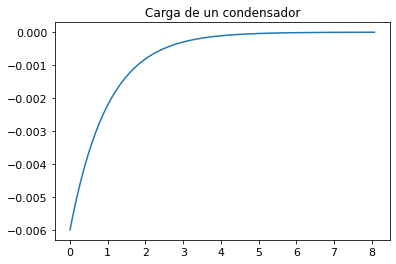

In [70]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Una etiqueta")

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

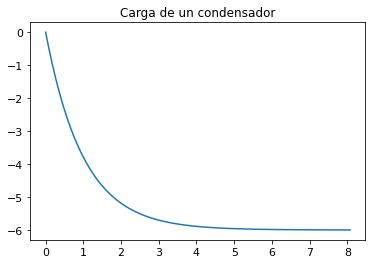

In [76]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'], label="Una etiqueta")
plt.savefig("test.svg", format="svg")

## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [86]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [87]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


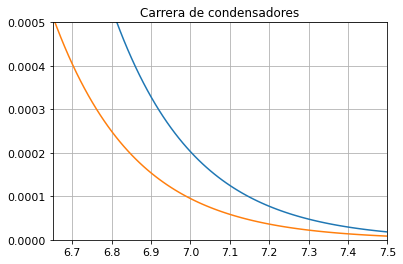

In [89]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")

Revisando el archivo tsv vemos quq 

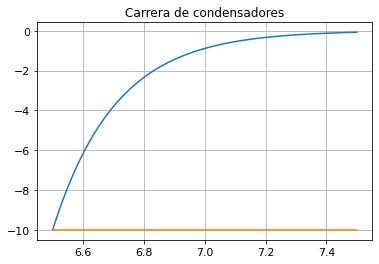

In [97]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.grid()
#plt.plot(resultados['tran']['T'], resultados['tran']['V1'])
plt.plot(resultados['tran']['T'], resultados['tran']['V2'])
#plt.plot(resultados['tran']['T'], resultados['tran']['V3'])
plt.plot(resultados['tran']['T'], resultados['tran']['V4'])

**Ejercicio premium:** Repite la simulación con LTspice (invocándolo como comando externo, leyendo los datos de un fichero `.raw` y volviendo a graficar con Matplotlib. 

In [84]:
%%writefile "carrera en condensadores.net"
* Carga condensador
v0 0 1 
r1 0 2 3k
c1 2 3 47u ic=0
c2 2 4 22u ic=0
.tran 0.01 7.5 6.5 uic
.end

Overwriting carrera en condensadores.net


## Circuitos en corriente alterna

** Ejercicio:** Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación. Ahkab utiliza otra sintaxis para expresar la corriente alterna. Esta está descrita en la [documentación](https://ahkab.readthedocs.io/en/latest/help/Netlist-Syntax.html#id24). 

In [38]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente alterna.net


In [41]:
lts "corriente alterna.net"

In [42]:
%pycat corriente alterna.log

Circuit: * Circuito en corriente alterna

.OP point found by inspection.

Date: Thu Dec 24 17:31:58 2020
Total elapsed time: 0.397 seconds.

tnom = 27
temp = 27
method = modified trap
totiter = 4128
traniter = 4128
tranpoints = 2065
accept = 1532
rejected = 533
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: 36 bytes object code size  0.0/0.0/[0.0]
Matrix Compiler2: off  [0.0]/0.0/0.0


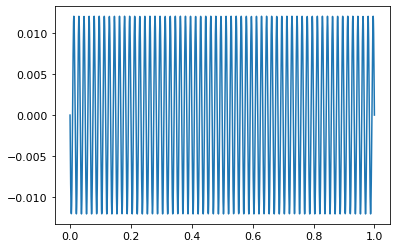

In [51]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
plt.plot(tiempo, corriente)
# O el voltaje
#plt.plot(tiempo, voltaje)

Realizamos el mismo circuito en Ahkab. Revisamos la [documentación](https://ahkab.readthedocs.io/en/latest/help/Netlist-Syntax.html#id24) para saber cómo expresar el circuito en corriente alterna, que sería de la siguiente manera: type=sin <VO> <VA> <FREQ> <TD> <THETA> <PHASE>. 
En el ejemplo tenemos 120 V y 60 Hz.

In [65]:
%%writefile "corrientealterna2.sp"
* Circuito en corriente alterna
r1 0 1 10k
v1 1 0 type=vac type=sin VO=0 VA=120 FREQ=60 TD=0 THETA=0
.tran tstep=0.01 tstart=0 tstop=1 uic=0
.end


Overwriting corrientealterna2.sp


In [66]:
!ahkab "corrientealterna2.sp"

470037e-03
8.677897781698122870e-01	4.930384607492327831e+01	-4.930384656835611404e-03
8.682088049835025023e-01	6.590057069891035724e+01	-6.590057135831384194e-03
8.686869442843800915e-01	8.281195647905470025e+01	-8.281195730748387024e-03
8.692253508183543920e-01	9.861861211528935200e+01	-9.861861310175303388e-03
8.698289403528944863e-01	1.114998665593664100e+02	-1.114998676745143462e-02
8.705108135440545736e-01	1.191140868935409429e+02	-1.191140880847558689e-02
8.713043290648673223e-01	1.181132859013044794e+02	-1.181132870823380435e-02
8.723284534486572817e-01	1.014374690832756727e+02	-1.014374700974240116e-02
8.731288956781806387e-01	7.779967064458878667e+01	-7.779967142222124314e-03
8.737569911199768447e-01	5.419687171979800411e+01	-5.419687226137941127e-03
8.742678273240471754e-01	3.270371603466893617e+01	-3.270371636125192234e-03
8.746824431535918931e-01	1.433164256554300842e+01	-1.433164270842738871e-03
8.749915740032416789e-01	3.811824719790732341e-01	-3.811824753203820501e-05
8

In [21]:
%%writefile "circuito sencillo3.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting circuito sencillo3.sp


In [22]:
!ahkab "circuito sencillo3.sp"

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.000000000000000000e+00
1.000000000000000000e+00	-1.000000000000000000e+00	-1.000000000000000056e-01
2.000000000000000000e+00	-2.000000000000000000e+00	-2.000000000000000111e-01
3.000000000000000000e+00	-3.000000000000000000e+00	-3.000000000000000444e-01
4.000000000000000000e+00	-4.000000000000000000e+00	-4.000000000000000222e-01W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.

5.000000000000000000e+00	-5.000000000000000000e+00	-5.000000000000000000e-01
6.000000000000000000e+00	-6.000000000000000000e+00	-6.000000000000000888e-01
7.000000000000000000e+00	-7.000000000000000000e+00	-7.000000000000000666e-01
8.000000000000000000e+00	-8.000000000000000000e+00	-8.000000000000000444e-01
9.000000000000000000e+00	-9.000000000000000000e+00	-9.000000000000000222e-01
#T	V1	I(V1)
6.500100010000999795e+00	-9.000000000000000000e+00	-9.000000000090901953e-01
6.50020002000

# Resumen de lo que se pide
Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas. Todas las gráficas se han pintado con Matplotlib, que es una biblioteca extendidísima en ciencia y tecnología. Es muuuuy bueno que la conozcáis. [Aquí](https://matplotlib.org/tutorials/introductory/pyplot.html) tenéis muchos ejemplos. 